In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle

#modify the display options to view entire dataframe
pd.options.display.max_columns = None


In [2]:
import zipfile
zip_path = r"C:\Users\sonas\Downloads\dataset.zip"

with zipfile.ZipFile(zip_path) as z:
    # List the files in the archive
    print(z.namelist())  # optional: helps to confirm file names

    # Load a specific CSV file (e.g., 'train.csv')
    with z.open('train.csv') as f:
        train_data = pd.read_csv(f)


['test.csv', '__MACOSX/', '__MACOSX/._test.csv', 'train.csv', '__MACOSX/._train.csv', 'test_data_subset.csv', '__MACOSX/._test_data_subset.csv']


In [3]:
train_data = pd.DataFrame(train_data)
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [5]:
column_names = np.array(train_data.columns)
column_names

array(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100

##### identify categorical and numerical columns to check data distribution and 5-point summary 

In [6]:
column_dtype = train_data.dtypes
categorical_cols = list(column_dtype[column_dtype=="object"].index)
continuous_cols = list(column_dtype[column_dtype=="float"].index)
continuous_cols.remove("loss")

##### check the distribution of the categorical variables

In [7]:
def categorical_dist(train_data, categorical_cols):
    categorical_cols_distribution = list()
    for cat_column in categorical_cols:
        categorical_cols_distribution.append(train_data[cat_column].value_counts())
    return categorical_cols_distribution

In [8]:
categorical_column_distribution = categorical_dist(train_data, categorical_cols)

In [9]:
len_categorical_cols = list(map(lambda x: len(x), categorical_column_distribution ))

In [10]:
#count the number of columns having the same number of unique values
distribution_dict = dict()
for val in len_categorical_cols:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else: 
        distribution_dict[val] = 1


#### Plot bar graph

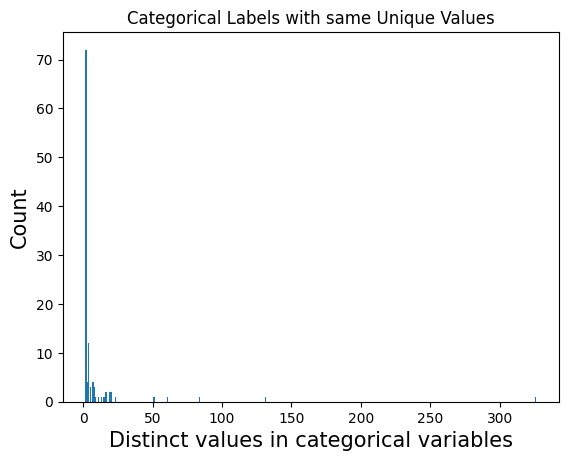

In [11]:
#plot showing the number of columns having the same number of unique values
keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values, width=0.8)
plt.xlabel("Distinct values in categorical variables", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Categorical Labels with same Unique Values")
plt.show()

##### check the distribution of continuous varibales 

In [12]:
train_data[continuous_cols].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


##### data cleaning and preprocessing

In [13]:
#Check if there is any missing value in the columuns 
#value of 0 indicates no missing values 
missing_values = train_data. isnull(). sum() 
np.max(missing_values) 

np.int64(0)

In [14]:
 #Manually insert a blank value across 5 rows
total_rows = train_data.shape[0] 
columns_with_blanks_cat = np.random.randint(1,116,2)  
columns_with_blanks_cont = np.random.randint(117,130, 3) 
columns_with_blank = np.append(columns_with_blanks_cat, columns_with_blanks_cont) 
#for every column insert 5 blanks at random locations 
for col in columns_with_blank: 
    rows_with_blanks = np.random.randint(1, total_rows, 5) 
    train_data.iloc[rows_with_blanks, col] = np.nan

In [15]:
#Validate the number of columns with missing values 
missing_values = train_data.isnull().sum() 
np.max(missing_values) 

np.int64(5)

In [16]:
#Displaying the columns with missing values 
columns_with_missing = train_data.columns[train_data.isnull().any()] 
print(columns_with_missing)

Index(['cat61', 'cat76', 'cont10', 'cont12', 'cont13'], dtype='object')


##### data preprocessing class with the following functions
- missing_value_conitnuous: handles missing values of continuous variables 
- missing_values_categorical: handles missing values of categorical variables
- outlier treatment: handle continous outliers

In [17]:
class Data_preprocessing:
    def __init__(self, train_data):
        self.train_data = train_data

    def missing_value_continuous(self, column_names_with_specific_type, imputation_type="mean"): 
        if imputation_type=="mean": 
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
            mean_imputer.fit(self.train_data[column_names_with_specific_type]) 
            self.train_data[column_names_with_specific_type] = mean_imputer.transform(self.train_data[column_names_with_specific_type])
            
        if imputation_type=="median": 
            median_imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
            median_imputer.fit(self.train_data[column_names_with_specific_type]) 
            self.train_data[column_names_with_specific_type] = median_imputer.transform(self.train_data[column_names_with_specific_type]) 
        return self. train_data

    def missing_value_categorical(self, column_names_with_specific_type, imputation_type="most_frequent"): 
        most_frequent = SimpleImputer(strategy="most_frequent") 
        most_frequent.fit(self.train_data[column_names_with_specific_type]) 
        self.train_data[column_names_with_specific_type] = most_frequent.transform(train_data[column_names_with_specific_type]) 
        return self.train_data 
    
    def outlier_treatment(self, Q1,Q3, IOR, columns_with_outlier, action):
        if action=="median": 
            for i in range(len(columns_with_outlier)): 
                column_name = columns_with_outlier[i] 
                median_outlier = np.median(self.train_data[column_name]) 
                self.train_data.loc[
                    self.train_data[
                        (self.train_data[column_name] < (Q1[column_name] - (1.5 * IQR[column_name]))) |
                        (self.train_data[column_name] > (Q3[column_name] + (1.5 * IQR[column_name])))
                    ].index,
                    column_name
                ] = median_outlier
                
        if action=="mean": 
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i] 
                mean_outlier = np.mean(self.train_data[column_name]) 
                self.train_data.loc[
                    self.train_data[
                        (self.train_data[column_name] < (Q1[column_name] - (1.5 * IQR[column_name]))) |
                        (self.train_data[column_name] > (Q3[column_name] + (1.5 * IQR[column_name])))
                    ].index,
                    column_name
                ] = mean_outlier
        if action=="remove": 
            for i in range(len(columns_with_outlier)):
                column_name = columns_with_outlier[i]
                self.train_data = self.train_data[~((self.train_data[column_name]<(Q1 [column_name]-(1.5*IQR[column_name])))|(self.train_data[column_name]>(Q3[column_name]+(1.5*IQR[column_name]))))]
        return self.train_data

In [18]:
Data_preprocessing_obj = Data_preprocessing(train_data)
train_data = Data_preprocessing_obj.missing_value_continuous(continuous_cols, "median")
train_data = Data_preprocessing_obj.missing_value_categorical(categorical_cols)

##### Handling outliers in the dataset

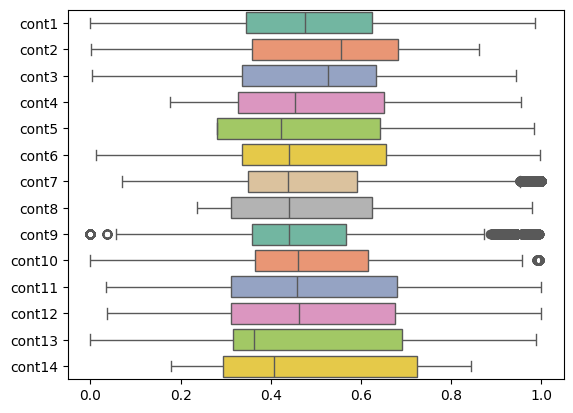

In [19]:
ax = sns.boxplot(data= train_data[continuous_cols], orient="h", palette = "Set2")

In [20]:
columns_with_outliers = ['cont7', 'cont9', 'cont10']

In [21]:
#Compute the interquartile range for all continuous columns
Q1 = train_data[continuous_cols].quantile(0.25)
Q3 = train_data[continuous_cols].quantile(0.75)
IQR = (Q3 -Q1)
train_data = Data_preprocessing_obj.outlier_treatment(Q1, Q3, IQR, columns_with_outliers, "median")

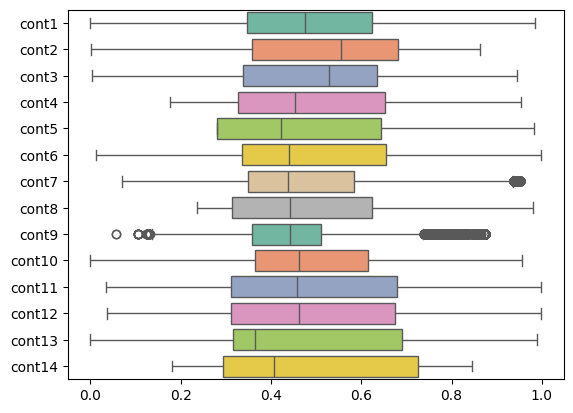

In [22]:
ax = sns.boxplot(data= train_data[continuous_cols], orient="h", palette = "Set2")

##### Visualizing the Output Variable

C:\Users\sonas\AppData\Local\Temp\ipykernel_5916\3089988761.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['loss'], hist= True, kde=True,


<Axes: xlabel='loss', ylabel='Density'>

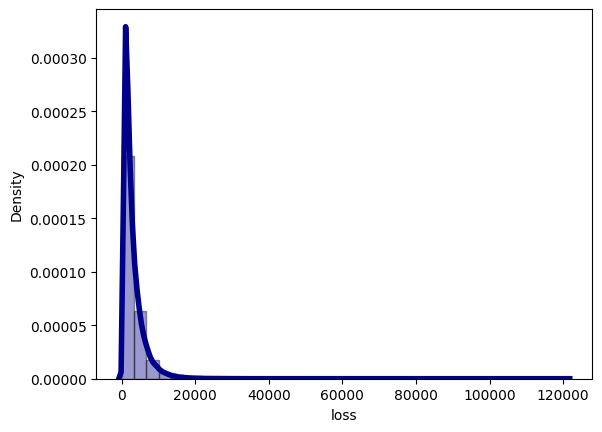

In [23]:
#Visualizing the distribution of loss value 
# Density Plot and Histogram of loss 
sns.distplot(train_data['loss'], hist= True, kde=True, 
             bins=int(180/5), color = 'darkblue', hist_kws={'edgecolor': 'black'},
             kde_kws=({'linewidth': 4})
            )

In [24]:
#We will use a log transformation on the dependent variable to reduce the scale 
train_data['loss'] = np.log(train_data['loss']) 

C:\Users\sonas\AppData\Local\Temp\ipykernel_5916\2055570836.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['loss'], hist=True, kde=True,


<Axes: xlabel='loss', ylabel='Density'>

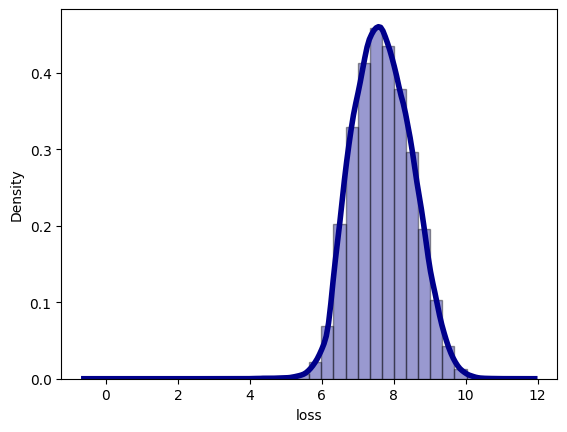

In [25]:
# Visualizing the distribution of loss value 
# Density Plot and Histogram of loss 
sns.distplot(train_data['loss'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor': 'black'}, 
             kde_kws={'linewidth': 4})

C:\Users\sonas\AppData\Local\Temp\ipykernel_5916\2907246912.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(train_data['loss']), hist=True, kde=True,


<Axes: xlabel='loss', ylabel='Density'>

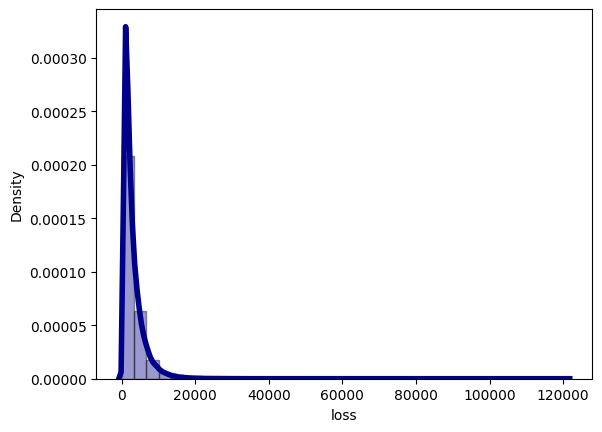

In [26]:
# anti-log (return to normal graph scale)
sns.distplot(np.exp(train_data['loss']), hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor': 'black'}, 
             kde_kws={'linewidth': 4})

#### fit a model

In [27]:
from sklearn. ensemble import RandomForestRegressor 
from sklearn.datasets import make_regression 
from sklearn. model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import RandomizedSearchCV 

In [28]:
#convert the int64 columns categorical 
Column_datatypes= train_data.dtypes
Integer_columns = list(Column_datatypes.where (lambda x: x =="int64").dropna ().index.values) 
train_data[Integer_columns] = train_data[Integer_columns].astype('category', copy=False)
X, y = train_data.drop(['id', 'loss'],axis=1), train_data['loss'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


##### feature elimination techniques for continuous and categorical features 

In [29]:
#Function for feature selection of numeric variables 
#Remove variables with constant variance 
#Remove variables with Quasi-Constant variance with a fixed threshold 
#Remove correlated variables

def feature_selection_numerical_variables(train_data,qthreshold, corr_threshold,exclude_numerical_cols_list): 
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    numerical_columns = list(train_data.select_dtypes(include=num_colums).columns) 
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]

    #remove variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(train_data[numerical_columns])
    constant_columns = [column for column in train_data [numerical_columns].columns
                        if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        train_data.drop(labels=constant_columns, axis=1, inplace=True)

    #remove deleted columns from dataframe 
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
                         
    #remove variables with constant variance 
    #Remove quasi-constant variables 
    constant_filter = VarianceThreshold(threshold=qthreshold) 
    constant_filter. fit(train_data [numerical_columns]) 
    constant_columns = [column for column in train_data [numerical_columns].columns
                        if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
    
    if len(constant_columns)>0:  
        train_data.drop(labels=constant_columns, axis=1, inplace=True)

    #remove deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]
    
    #remove variables with constant variance
    #Remove quasi-constant variables
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(train_data[numerical_columns])
    qconstant_columns = [column for column in train_data[numerical_columns].columns
                         if column not in train_data[numerical_columns].columns[constant_filter.get_support()]]
                                                     
    if len(qconstant_columns)>0:
        train_data.drop(labels=qconstant_columns, axis=1, inplace=True)

    #remove deleted columns from dataframe 
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]

    #remove correlated variables 
    correlated_features = set()
    correlation_matrix = train_data[numerical_columns].corr()
    ax = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45, horizontalalignment='right');
    #print(correlation_matrix)

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list 
                if colcompared not in correlated_features:
                    correlated_features.add(colname)
    train_data.drop(labels=correlated_features, axis=1, inplace=True)
                
    return train_data, constant_columns, qconstant_columns, correlated_features
    
    

In [30]:
qthreshold = 0.01
corr_threshold = 0.85
exclude_numerical_cols_list = ['id', 'loss']

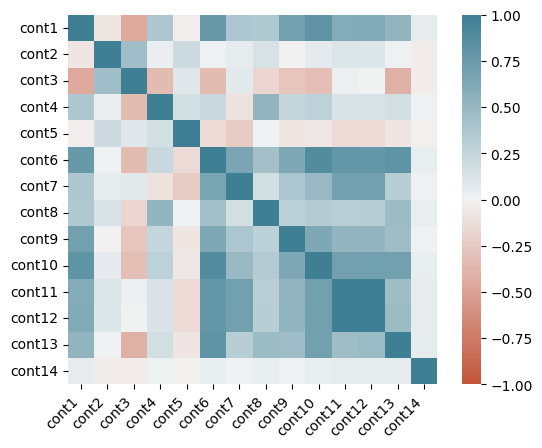

In [31]:
train_data, constant_columns, qconstant_columns, correlated_features = feature_selection_numerical_variables(train_data,qthreshold, corr_threshold,exclude_numerical_cols_list)

##### handling correlation between categorical variables

In [32]:
# save the encoders to disk to be fitted on test data 
for cf1 in categorical_cols:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    filename = cf1+ ".sav"
    pickle.dump(le, open(filename, 'wb'))
    train_data[cf1] = le.transform(train_data[cf1]) 

In [33]:
#snippet to calculate the unique values with a categorical columns
df = pd. DataFrame(columns= ["Column_Name", "Count"])

for cat in categorical_cols:
    unique_value_count = len(train_data[cat].unique())
    df = pd.concat([df, pd.DataFrame([{'Column_Name': cat, "Count": int(unique_value_count)}])], ignore_index=True)
columns_unique_value = np.array(df.Count.value_counts().index)

In [34]:
#snippet to identify the dependent/correlated categorical variables and drop them 
columns_to_drop_cat = set() 
correlated_columns = dict() 

for unique_value_count in columns_unique_value: 
    if unique_value_count>1: 
        categorical_cols = df.loc[df.Count==unique_value_count, 'Column_Name'] 
        categorical_cols = categorical_cols.reset_index(drop=True) 
        columns_length=len(categorical_cols) 
        for col in range(columns_length-1): 
            column_to_compare = categorical_cols[col] 
            columns_compare_against = categorical_cols[(col+1):columns_length] 
            chi_scores = chi2(train_data[columns_compare_against], train_data[column_to_compare]) 
            if column_to_compare not in columns_to_drop_cat: 
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped] 
                correlated_columns[column_to_compare]=columns_to_drop_array 
                columns_to_drop_cat.update(columns_to_drop_array)

In [35]:
train_data = train_data.drop (columns_to_drop_cat, axis=1)

In [36]:
correlated_features = list(correlated_features) 
columns_to_drop_cat = list(columns_to_drop_cat) 
columns_to_drop_cat.extend(correlated_features) 
columns_to_drop = columns_to_drop_cat.copy() 

#output the columns_to_drop file to a csv 
columns_to_drop_df=pd.DataFrame(columns_to_drop, columns=['colnames']) 
columns_to_drop_df.to_csv("columns_to_drop.csv", index=False)


#### Fit a ML Model

In [37]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.datasets import make_regression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import RandomizedSearchCV 

In [38]:
#convert the int64 columns categorical 
Column_datatypes= train_data.dtypes 
Integer_columns = list(Column_datatypes.where(lambda x: x =="int64").dropna().index.values) 
train_data[Integer_columns] = train_data[Integer_columns].astype('category', copy=False) 
X, y = train_data.drop(['id', 'loss'], axis=1), train_data['loss'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [39]:
#Instantiate model with 100 decison trees
rf_base = RandomForestRegressor(n_estimators=100, random_state = 42, oob_score=True)
rf_base.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [40]:
#save the model output 
pickle.dump(rf_base, open("basemodel_rf", 'wb'))


In [41]:
#load the saved model and predict on the test data 
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))

In [42]:
#validate the accuracy of the base model 
#compare the model accuracies 
Y_test_predict_base = basedmodel_rf.predict(X_test) 
print("Base model accuracy:", np.sqrt(mean_squared_error(y_test, Y_test_predict_base)))

Base model accuracy: 0.6667234555280465


#### HyperParameter Tuning using RandomSearchCV

In [47]:
#number of trees 
n_estimators = [100,200,300,400,500] 

#Number of features to consider at every split 
max_features = ['sqrt'] 

# Maximum number of levels in tree 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] 

# Minimum number of samples required to split a node 
min_samples_split = [200, 400, 600] 

# Minimum number of samples required at each leaf node 
min_samples_leaf = [1, 2, 4] 

# Method of selecting samples for training each tree 
bootstrap = [True, False] 

# Create the random grid 
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split, 
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

In [48]:
#Use the random grid to search for best hyperparameters 
#base model to tune 
rf = RandomForestRegressor()

#5-fold cross validation 
# search across 150 different combinations, and use all available cores 
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, n_iter = 5, verbose=2, random_state=42, n_jobs =-1) 
                              
#Fit the random search model 
rf_tuned.fit(X_train, y_train)
                              
#save the model output 
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [49]:
rf_tuned.best_params_

{'n_estimators': 100,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [53]:
tune_model_rf = pickle.load(open("tunedmodel_rf", 'rb'))
y_test_predict_tuned = tune_model_rf.predict(X_test)
print("Tuned model accuracy:", np.sqrt(mean_squared_error(y_test, y_test_predict_tuned)))

Tuned model accuracy: 0.6543063162594845


#### fit GBM model 

In [57]:
from sklearn.ensemble import GradientBoostingRegressor 
#GBM algorithm 
gbm_base = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0) 
gbm_base.fit(X_train, y_train) 

#save the GBM model 
pickle.dump(gbm_base, open("basemodel_GBM", 'wb'))

In [58]:
#load the saved model and predict on the test data 
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))
y_test_predict_tuned = basemodel_GBM.predict(X_test) 

print("Base model GBM accuracy:", np.sqrt(mean_squared_error(y_test, y_test_predict_tuned)))


Base model GBM accuracy: 0.7004418131911399
